## Imports

In [1]:
import eduanalytics
from eduanalytics import model_data, pipeline_tools, reporting

In [2]:
import re, os, sys
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

## Explore results

In [3]:
path = eduanalytics.credentials_path
group = eduanalytics.credentials_group

engine = model_data.connect_to_database(path, group)

In [4]:
tbl_name = 'aoa_admissions_inschool'

In [5]:
results = model_data.get_data_for_modeling(engine, 
            tbl_name, status = 'predictions')

In [6]:
train = results[results.set == 'train']
test = results[results.set == 'test']

In [7]:
print(train.outcome.value_counts())
print(train.shape)

0.0    688
1.0    128
Name: outcome, dtype: int64
(816, 4)


In [8]:
print(test.outcome.value_counts())
print(test.shape)

0.0    339
1.0     63
Name: outcome, dtype: int64
(402, 4)


In [9]:
pkl_path = '/Volumes/IIME/EDS/data/admissions/pkls'

In [10]:
grid_search = reporting.load_model(pkl_path, tbl_name, 'rf_grid')

In [11]:
grid_search

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('dummyencoder', DummyEncoder()), ('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=N...imators=10, n_jobs=1, oob_score=False, random_state=1100,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'randomforestclassifier__n_estimators': [10, 50, 100, 200, 500, 1000], 'randomforestclassifier__max_depth': [1, 5, 10, 20, 50], 'randomforestclassifier__max_features': ['sqrt', 'log2'], 'randomforestclassifier__min_samples_split': [2, 5, 10], 'imputer__strategy': ['mean', 'median']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [12]:
risk_scores = test.predicted
hard_predictions = [1 if score >= 0.5 else 0 for score in risk_scores]

In [13]:
percentages = [15, 20]
hard_predictions_t1 = reporting.generate_binary_at_k(risk_scores, percentages[0])
hard_predictions_t2 = reporting.generate_binary_at_k(risk_scores, percentages[1])

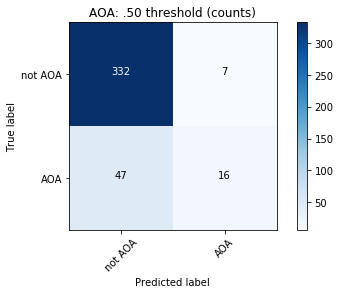

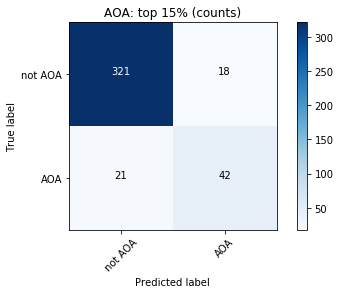

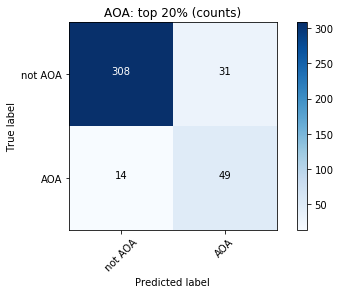

In [14]:
# Compute confusion matrix
class_names = ['not AOA', 'AOA']

labels = ['.50 threshold', 'top {}%'.format(percentages[0]), 'top {}%'.format(percentages[1])]
plots = zip([hard_predictions, hard_predictions_t1, hard_predictions_t2], labels)
title = class_names[1]

# Plot confusion matrix with counts
for predictions, label in plots:
    plt.figure()
    reporting.build_confusion_matrix(
    test.outcome, predictions, 
    class_names, 
    '{}: {}'.format(title, label))

plt.show()

In [15]:
forest = pipeline_tools.extract_model_from_pipeline(grid_search)
print(type(forest))

<class 'sklearn.ensemble.forest.RandomForestClassifier'>


In [16]:
transformed_columns = pipeline_tools.get_transformed_columns(grid_search)

In [17]:
importances, std, indices = reporting.compute_feature_importances_ensemble(
    forest, transformed_columns)

1: clerkship_honors_count = 0.248
2: shelf_exam_above90_count = 0.101
3: school_exam_above90_count = 0.038
4: median_income_zipcode = 0.034
5: bcpm_hours_cumulative = 0.031
6: total_gpa_cumulative = 0.029
7: total_percentile = 0.028
8: bcpm_gpa_cumulative = 0.026
9: bio_percentile = 0.025
10: phy_chem_percentile = 0.025
11: num_schools_accepted_to = 0.022
12: bcpm_a_counts = 0.021
13: chem_a_counts = 0.020
14: biol_a_counts = 0.020
15: clerkship_pass_count = 0.019
16: race_White = 0.019
17: parent_edu_score = 0.017
18: bcpm_b_counts = 0.016
19: math_a_counts = 0.015
20: chem_b_counts = 0.014
21: biol_b_counts = 0.014
22: phys_a_counts = 0.014
23: age_at_application = 0.013
24: exp_athletics_1.0 = 0.009
25: school_exam_below65_count = 0.008
26: phys_b_counts = 0.007
27: math_b_counts = 0.007
28: bcmp_gpa_juni_higher_1.0 = 0.006
29: college_top_25_Top 25 = 0.006
30: bcmp_gpa_soph_higher_1.0 = 0.006
31: gender_M = 0.006
32: shelf_exam_below65_count = 0.006
33: total_gpa_juni_higher_1.0 = 

In [18]:
importances

array([  2.60e-02,   3.07e-02,   2.91e-02,   5.09e-03,   5.63e-03,
         4.81e-03,   2.09e-02,   1.62e-02,   3.71e-03,   1.61e-04,
         2.96e-04,   1.49e-02,   7.15e-03,   1.63e-03,   6.72e-04,
         1.96e-02,   1.40e-02,   1.10e-03,   1.50e-04,   4.77e-04,
         1.97e-02,   1.41e-02,   1.20e-03,   2.94e-04,   1.36e-02,
         7.19e-03,   6.10e-04,   2.48e-01,   1.95e-02,   3.01e-04,
         5.96e-03,   1.01e-01,   7.70e-03,   3.80e-02,   2.80e-02,
         2.49e-02,   2.47e-02,   3.91e-03,   1.75e-02,   3.41e-02,
         1.30e-02,   2.24e-02,   3.14e-03,   4.45e-03,   3.73e-03,
         3.94e-03,   4.11e-03,   3.01e-03,   3.81e-03,   5.49e-03,
         3.95e-04,   5.93e-03,   6.66e-04,   4.50e-03,   4.93e-03,
         6.02e-03,   2.10e-03,   6.22e-03,   2.61e-03,   3.49e-03,
         5.12e-03,   1.53e-03,   1.39e-04,   7.32e-04,   2.04e-04,
         6.19e-04,   5.98e-03,   6.04e-03,   8.64e-04,   1.20e-03,
         9.34e-04,   1.01e-03,   1.09e-03,   1.84e-03,   3.72e

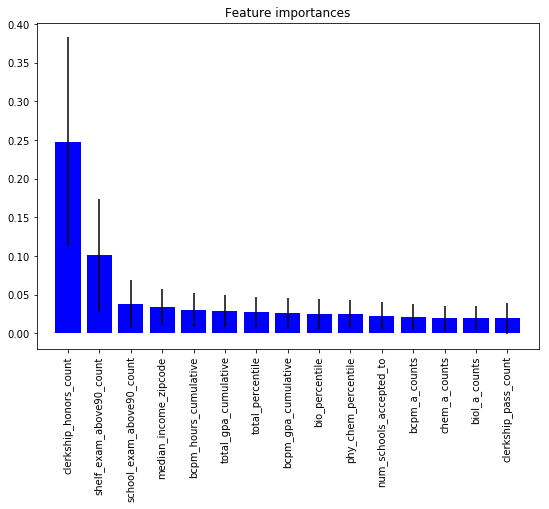

In [19]:
# Plot the feature importances of the forest
plt.figure(figsize=(9,6))
reporting.plot_feature_importances(
    importances, std, indices, transformed_columns)

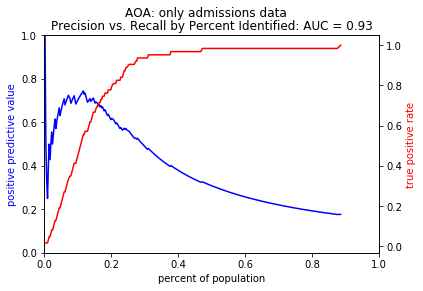

In [20]:
outcome = 'AOA'
features = 'only admissions data'
reporting.plot_precision_recall_n(test.outcome, risk_scores, '{}: {}'.format(outcome, features))

In [395]:
# TODO: Figure out how to output to database
# TODO: Figure out sklearn2pmml
# TODO: Multiclass classification
# TODO: Compare classifiers (logistic regression?)
# TODO: Incorporate lime
# TODO: Incorporate autosklearn?